#  Задача 1.  Вводное задание.



Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval.

Чтобы прочитать из архива данные, используйте следующий код:

In [2]:
import numpy as np
with np.load('data_interp.npz') as data:
  x1, y1 = data['x1'], data['y1']

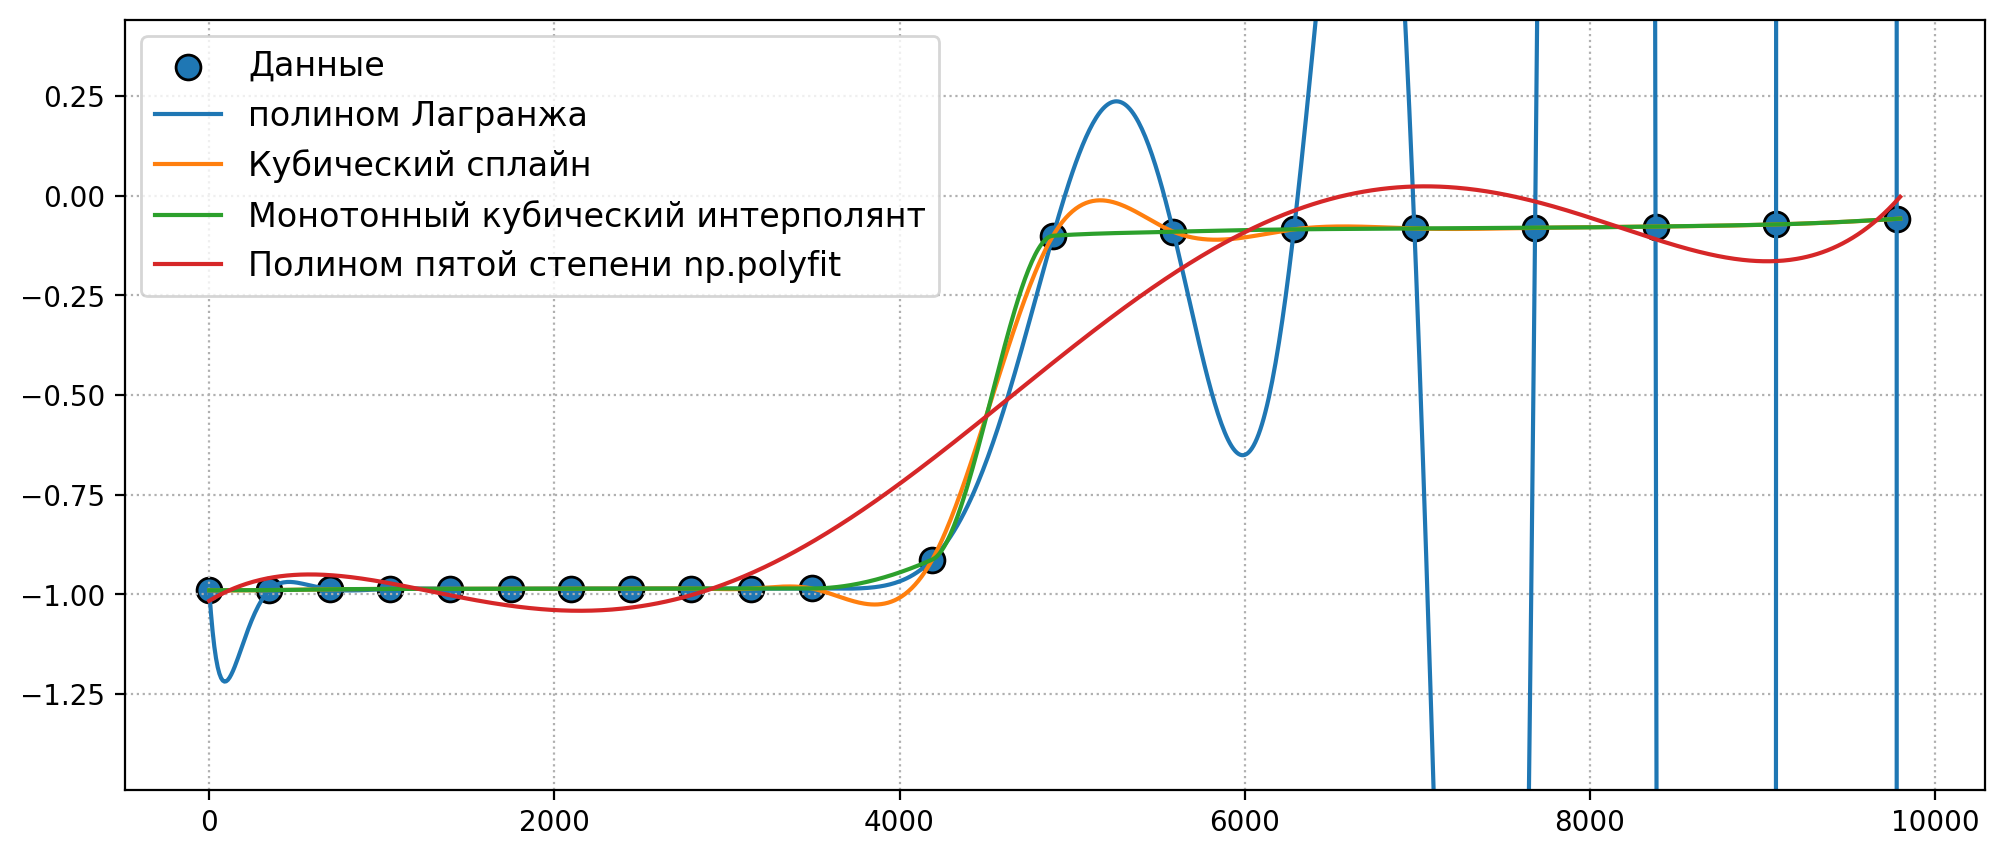

In [3]:
from scipy import interpolate
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(x1, y1, label = 'Данные', s = 80, edgecolors = 'black')

# многочлен Лагранжа
x_line = np.linspace(np.min(x1), np.max(x1) + 20, 1000)
lagrange_poly = interpolate.lagrange(x1, y1)
plt.plot(x_line, Polynomial(lagrange_poly.coef[::-1])(x_line), label = 'полином Лагранжа')

# Кубический сплайн
cubic_spline = interpolate.CubicSpline(x1, y1)
plt.plot(x_line, cubic_spline(x_line), label = 'Кубический сплайн')

# монотонный кубический интерполянт
chirp = interpolate.PchipInterpolator(x1, y1)
plt.plot(x_line, chirp(x_line), label = 'Монотонный кубический интерполянт')


# аппроксимация полиномами, степени не выше чем 5
poly = np.polyfit(x1, y1, deg = 5)
plt.plot(x_line, np.poly1d(poly)(x_line), label = 'Полином пятой степени np.polyfit')

plt.ylim(np.min(y1) - 0.5, np.max(y1) + 0.5)
plt.legend(fontsize = 12, loc = 'upper left')







plt.grid(ls = ':')

# Задача 2. Интерполяция полиномом Лагранжа.



Допишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [1]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.

    Given a set of pairs ``(x_k, y_k)``, construct
    a Lagrange polynomial ``f(x)``, such that

    .. math::

        f(x_k) = y_k   for k =0, ..., n-1

    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates

    Attributes
    ----------
    __call__

    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)

    def __call__(self, x):
        """Evaluate the interpolator at a given point.

        Parameters
        ----------
        x : float

        Returns
        -------
        the value of the interpolator at ``x``.
        """
        X = np.tile(self.xk, (len(self.xk), 1))
        numerator, denominator = (x - X.T), (X - X.T)
        members = np.divide(numerator, 
                            denominator, 
                            out = np.ones_like(X), 
                            where = denominator!=0)
        l = np.product(members, axis = 0)
        return np.sum(l * self.yk) 
        # raise NotImplementedError()

In [2]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

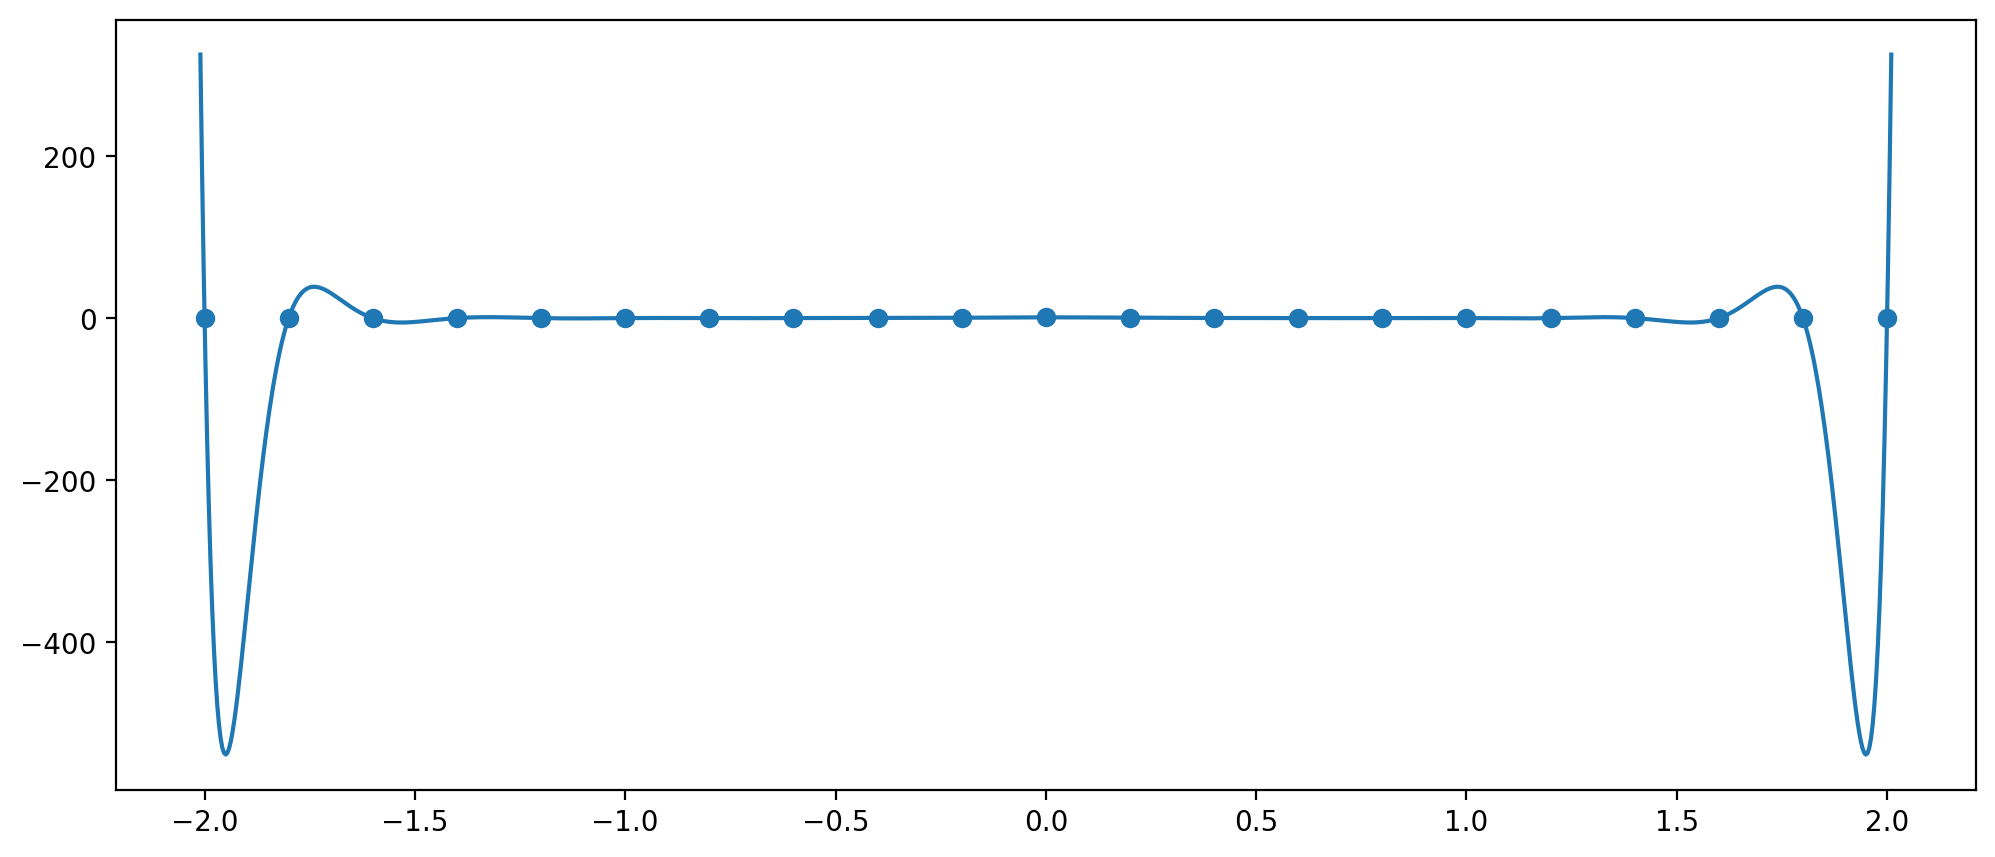

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 5), dpi = 200)
x_line = np.linspace(-2.01, 2.01, 1000)
plt.scatter(xx, yy)
plt.plot(x_line, [lagr(x) for x in x_line])

# Задача 3. Феномер Рунге



Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике.

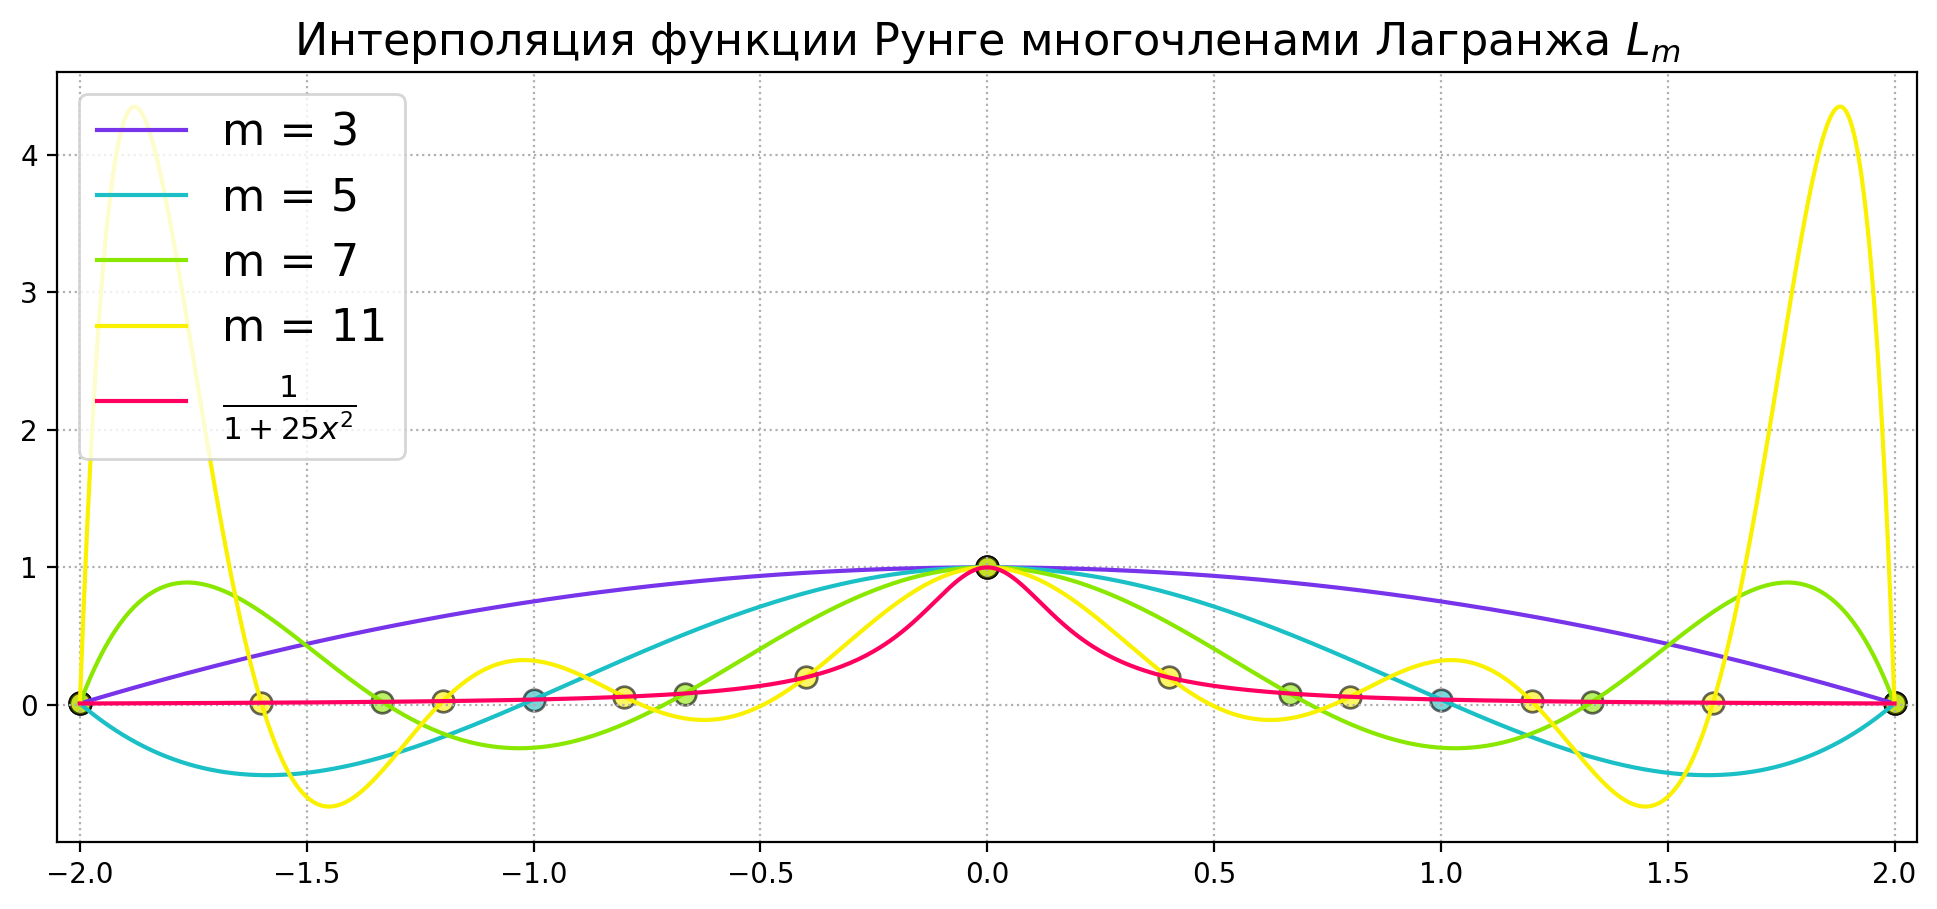

In [33]:
left_limit, right_limit = -2, 2
x_line = np.linspace(left_limit, right_limit, 1000)
m_values = [3, 5, 7, 11]
intepolations_uniform = []
colors = ['#7734ea', '#1ac0c6', '#8ae800', '#faf100', '#ff0061']
plt.figure(figsize = (12, 5), dpi = 200)
for m, color in zip(m_values, colors):
    grid_x = np.linspace(left_limit, right_limit, m)
    grid_y = runge_func(grid_x)
    lagr = LagrangeInterpolator(grid_x, grid_y)
    y_interpolation = [lagr(x) for x in x_line]
    intepolations_uniform.append(y_interpolation)
    plt.plot(x_line, y_interpolation, color = color, alpha = 1, label = f'm = {m}')
    plt.scatter(grid_x, grid_y, color = color, alpha = 0.6, s = 60, edgecolors = '#000000')
plt.plot(x_line, runge_func(x_line), color = colors[-1], label = r'$\frac{1}{1 + 25 x^{2}}$')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlim(left_limit - 0.05, right_limit + 0.05)
plt.grid(ls = ':')
plt.title('Интерполяция функции Рунге многочленами Лагранжа $L_{m}$', fontsize = 16);

Допишите функцию, которая возвращает узлы Чебышева.

In [16]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    k = np.arange(n, 0, -1)
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos(np.pi * (2 * k - 1) / (2 * n))
    

In [18]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5)

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


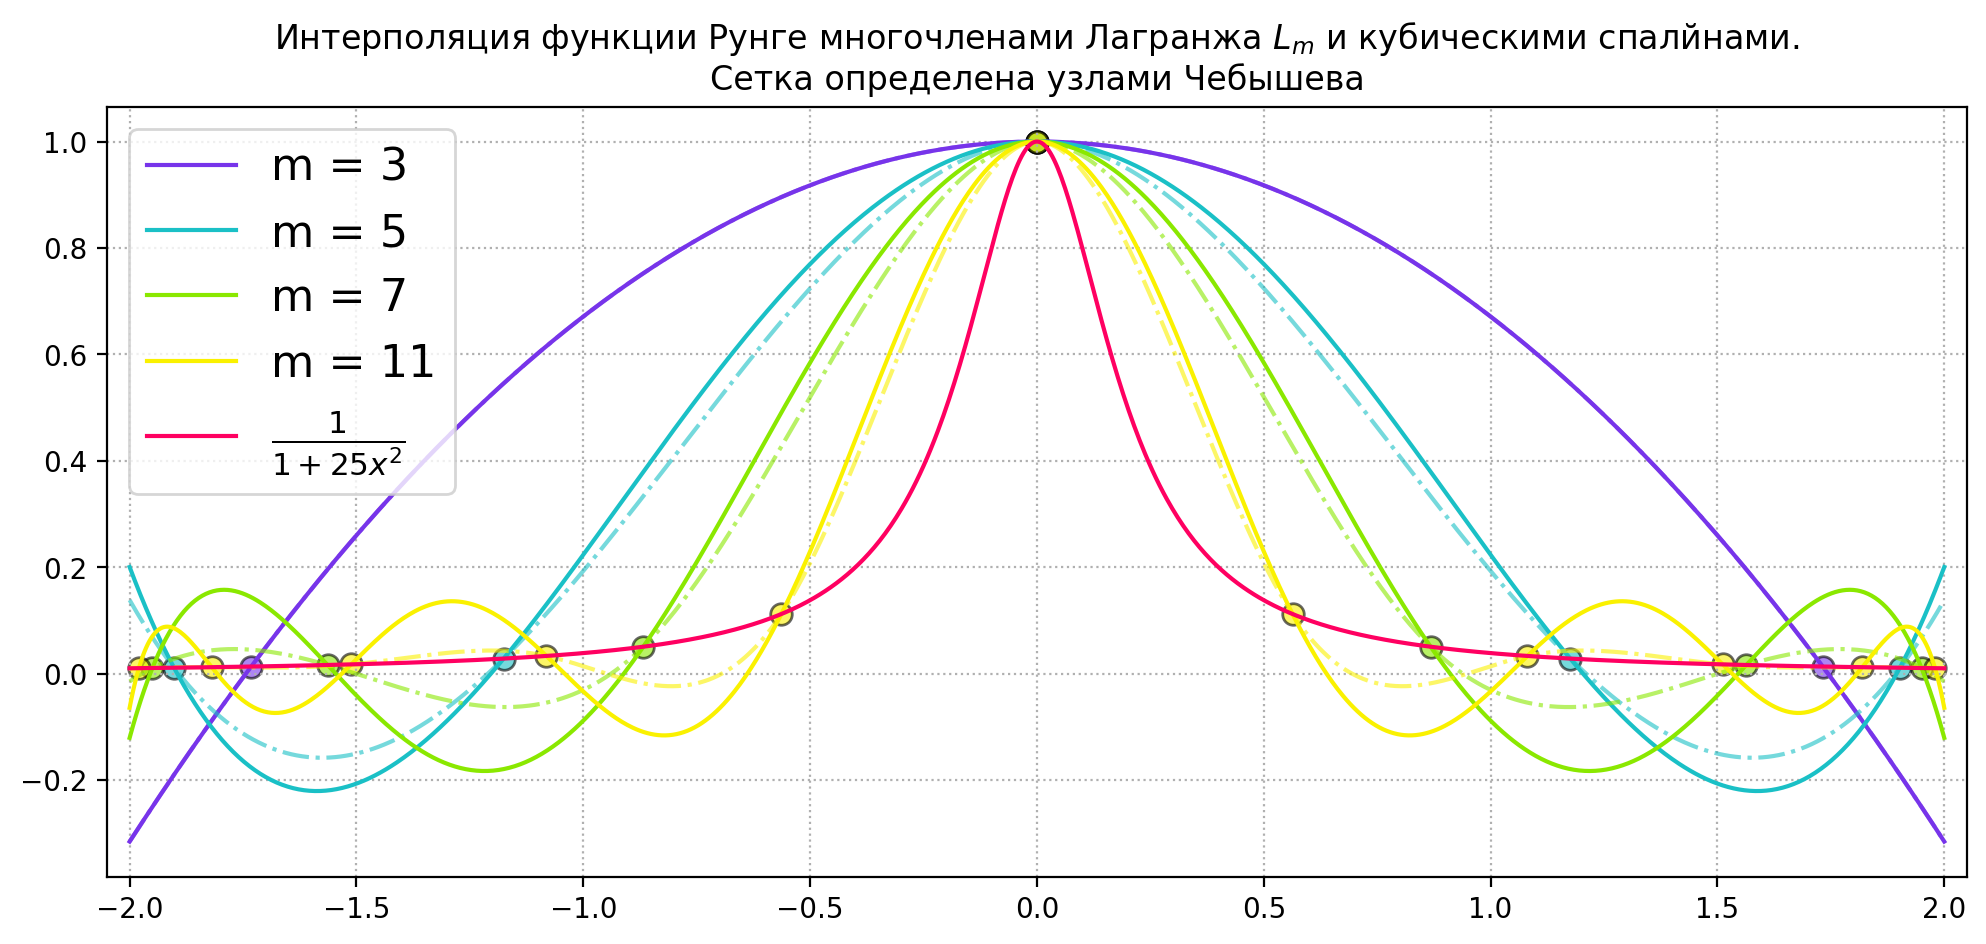

In [34]:
from scipy import interpolate
left_limit, right_limit = -2, 2
x_line = np.linspace(left_limit, right_limit, 1000)
m_values = [3, 5, 7, 11]
colors = ['#7734ea', '#1ac0c6', '#8ae800', '#faf100', '#ff0061']
interpolations_cheb = []
plt.figure(figsize = (12, 5), dpi = 200)
for m, color in zip(m_values, colors):
    grid_x = cheb_nodes(m, a = left_limit, b = right_limit)
    grid_y = runge_func(grid_x)
    lagr = LagrangeInterpolator(grid_x, grid_y)
    spline_interpolation = interpolate.CubicSpline(x = grid_x,
                                                   y = grid_y)(x_line)
    y_interpolation = [lagr(x) for x in x_line]
    interpolations_cheb.append(y_interpolation)
    plt.plot(x_line, y_interpolation, color = color, alpha = 1, label = f'm = {m}')
    plt.scatter(grid_x, grid_y, color = color, alpha = 0.6, s = 60, edgecolors = '#000000')
    plt.plot(x_line, spline_interpolation, '-.', color = color, alpha = 0.6)
    
plt.plot(x_line, runge_func(x_line), color = colors[-1], label = r'$\frac{1}{1 + 25 x^{2}}$')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlim(left_limit - 0.05, right_limit + 0.05)
plt.grid(ls = ':')
plt.title('Интерполяция функции Рунге многочленами Лагранжа $L_{m}$ и кубическими спалйнами.\nСетка определена узлами Чебышева', fontsize = 12);

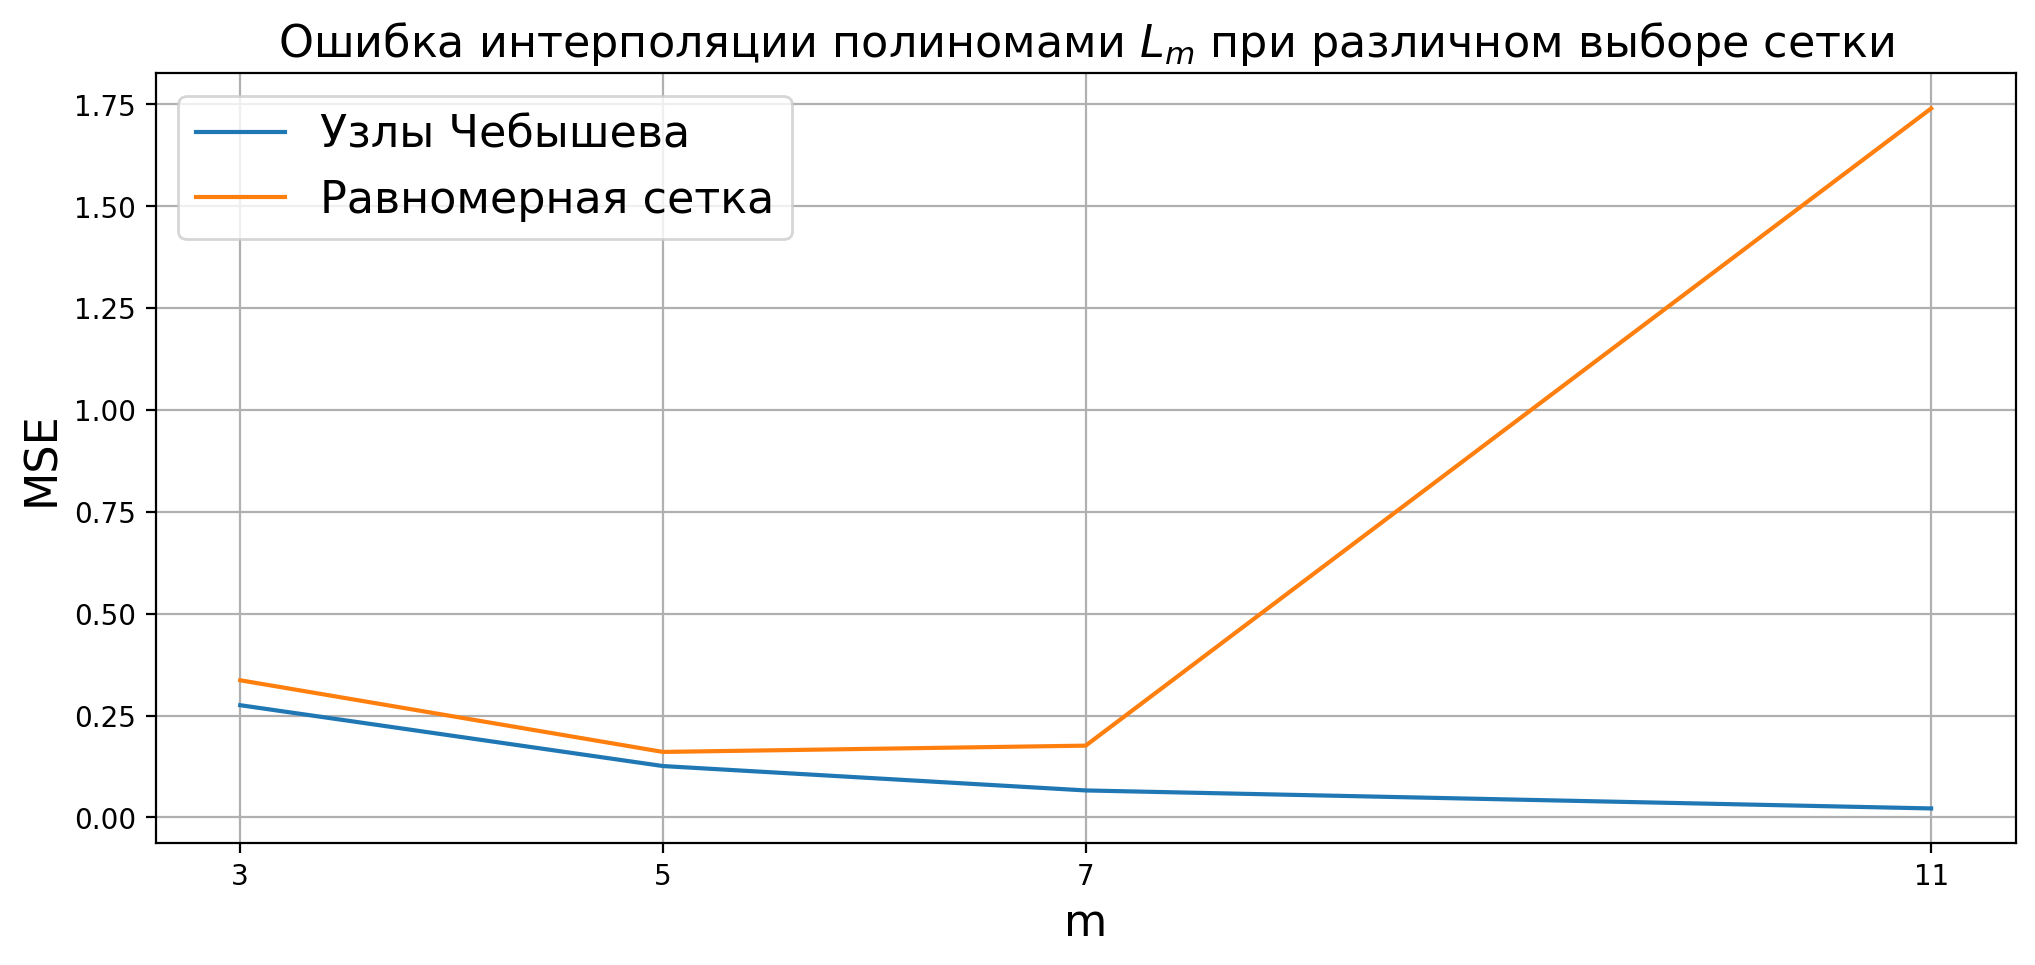

In [38]:
from sklearn import metrics
true_values = runge_func(x_line)
MSE_cheb = [metrics.mean_squared_error(true_values, interp) for interp in interpolations_cheb]
MSE_uniform = [metrics.mean_squared_error(true_values, interp) for interp in intepolations_uniform]
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(m_values, MSE_cheb, label = 'Узлы Чебышева')
plt.plot(m_values, MSE_uniform, label = 'Равномерная сетка')
plt.legend(fontsize = 16)
plt.xlabel('m', fontsize = 16)
plt.ylabel('MSE', fontsize = 16)
plt.xticks(m_values)
plt.grid()
plt.title("Ошибка интерполяции полиномами $L_m$ при различном выборе сетки", fontsize = 16);

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

In [40]:
def U(x):
    epsilon = 0.21
    return np.sqrt(epsilon * (2 + epsilon) / (2 * np.pi * (1 + epsilon - np.cos(x))))

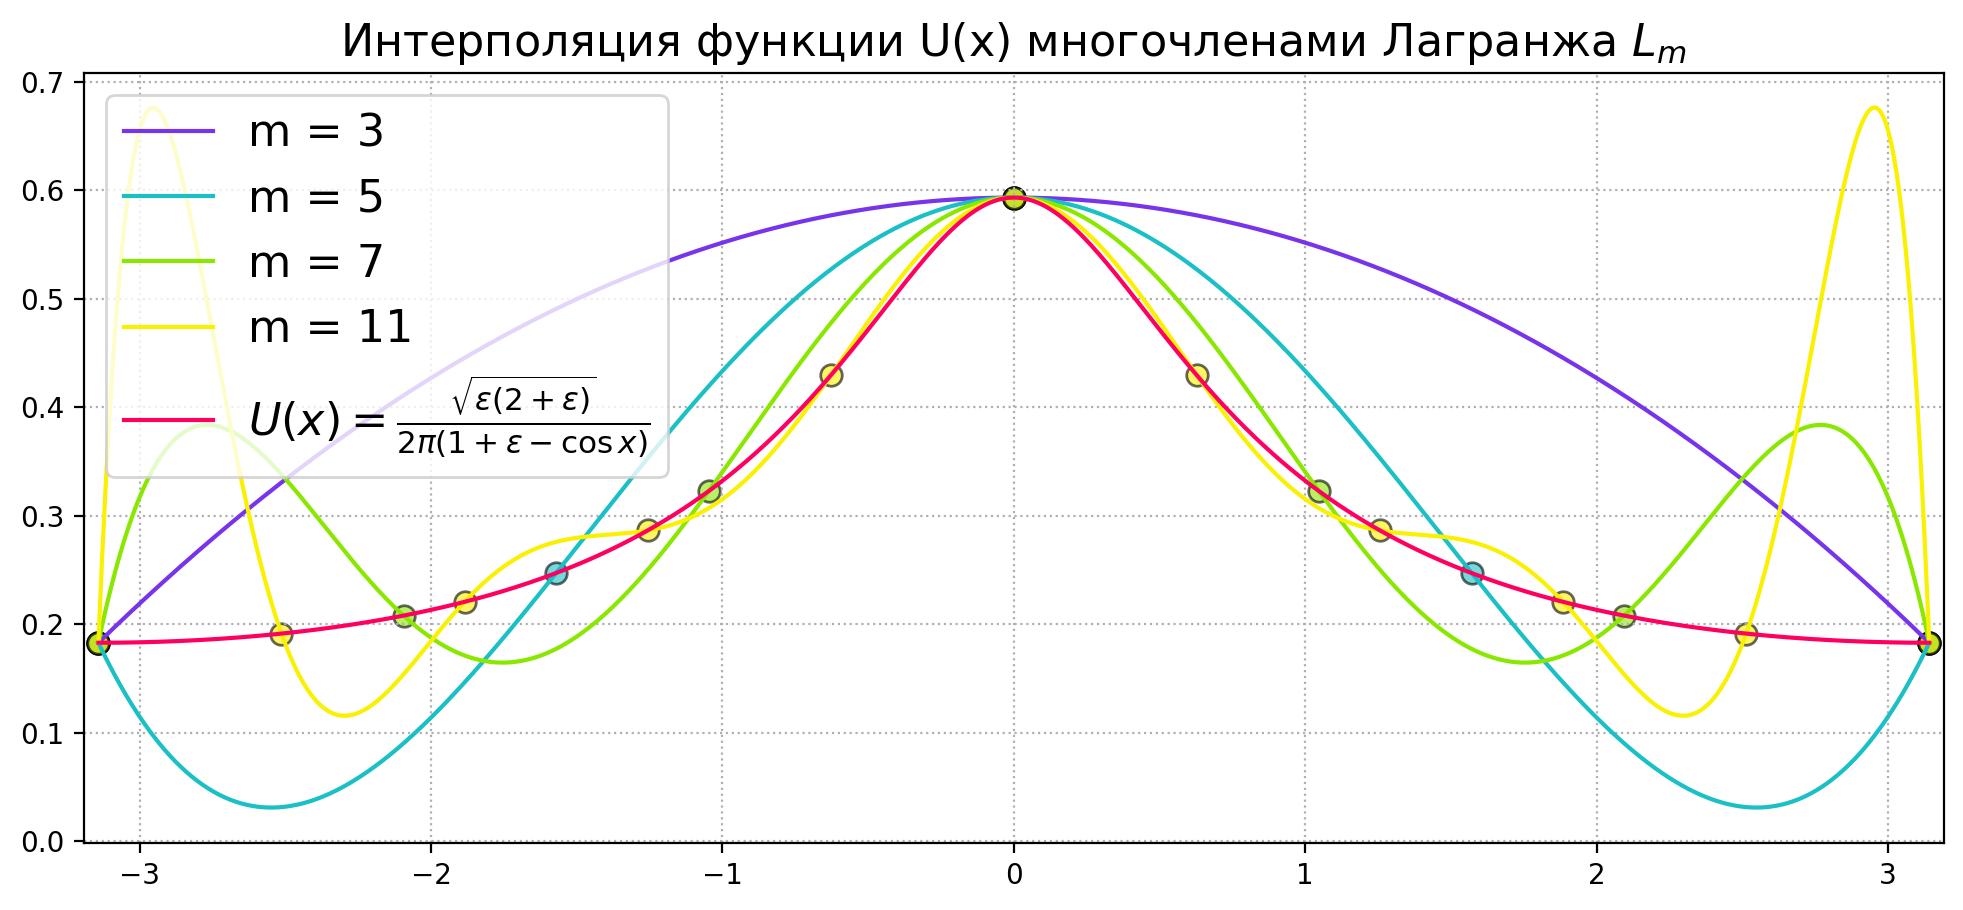

In [45]:
left_limit, right_limit = -np.pi, np.pi
x_line = np.linspace(left_limit, right_limit, 1000)
m_values = [3, 5, 7, 11]
intepolations_uniform = []
colors = ['#7734ea', '#1ac0c6', '#8ae800', '#faf100', '#ff0061']
plt.figure(figsize = (12, 5), dpi = 200)
for m, color in zip(m_values, colors):
    grid_x = np.linspace(left_limit, right_limit, m)
    grid_y = U(grid_x)
    lagr = LagrangeInterpolator(grid_x, grid_y)
    y_interpolation = [lagr(x) for x in x_line]
    intepolations_uniform.append(y_interpolation)
    plt.plot(x_line, y_interpolation, color = color, alpha = 1, label = f'm = {m}')
    plt.scatter(grid_x, grid_y, color = color, alpha = 0.6, s = 60, edgecolors = '#000000')
plt.plot(x_line, U(x_line), color = colors[-1], label = r'$U(x) = \frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}$')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlim(left_limit - 0.05, right_limit + 0.05)
plt.grid(ls = ':')
plt.title('Интерполяция функции U(x) многочленами Лагранжа $L_{m}$', fontsize = 16);

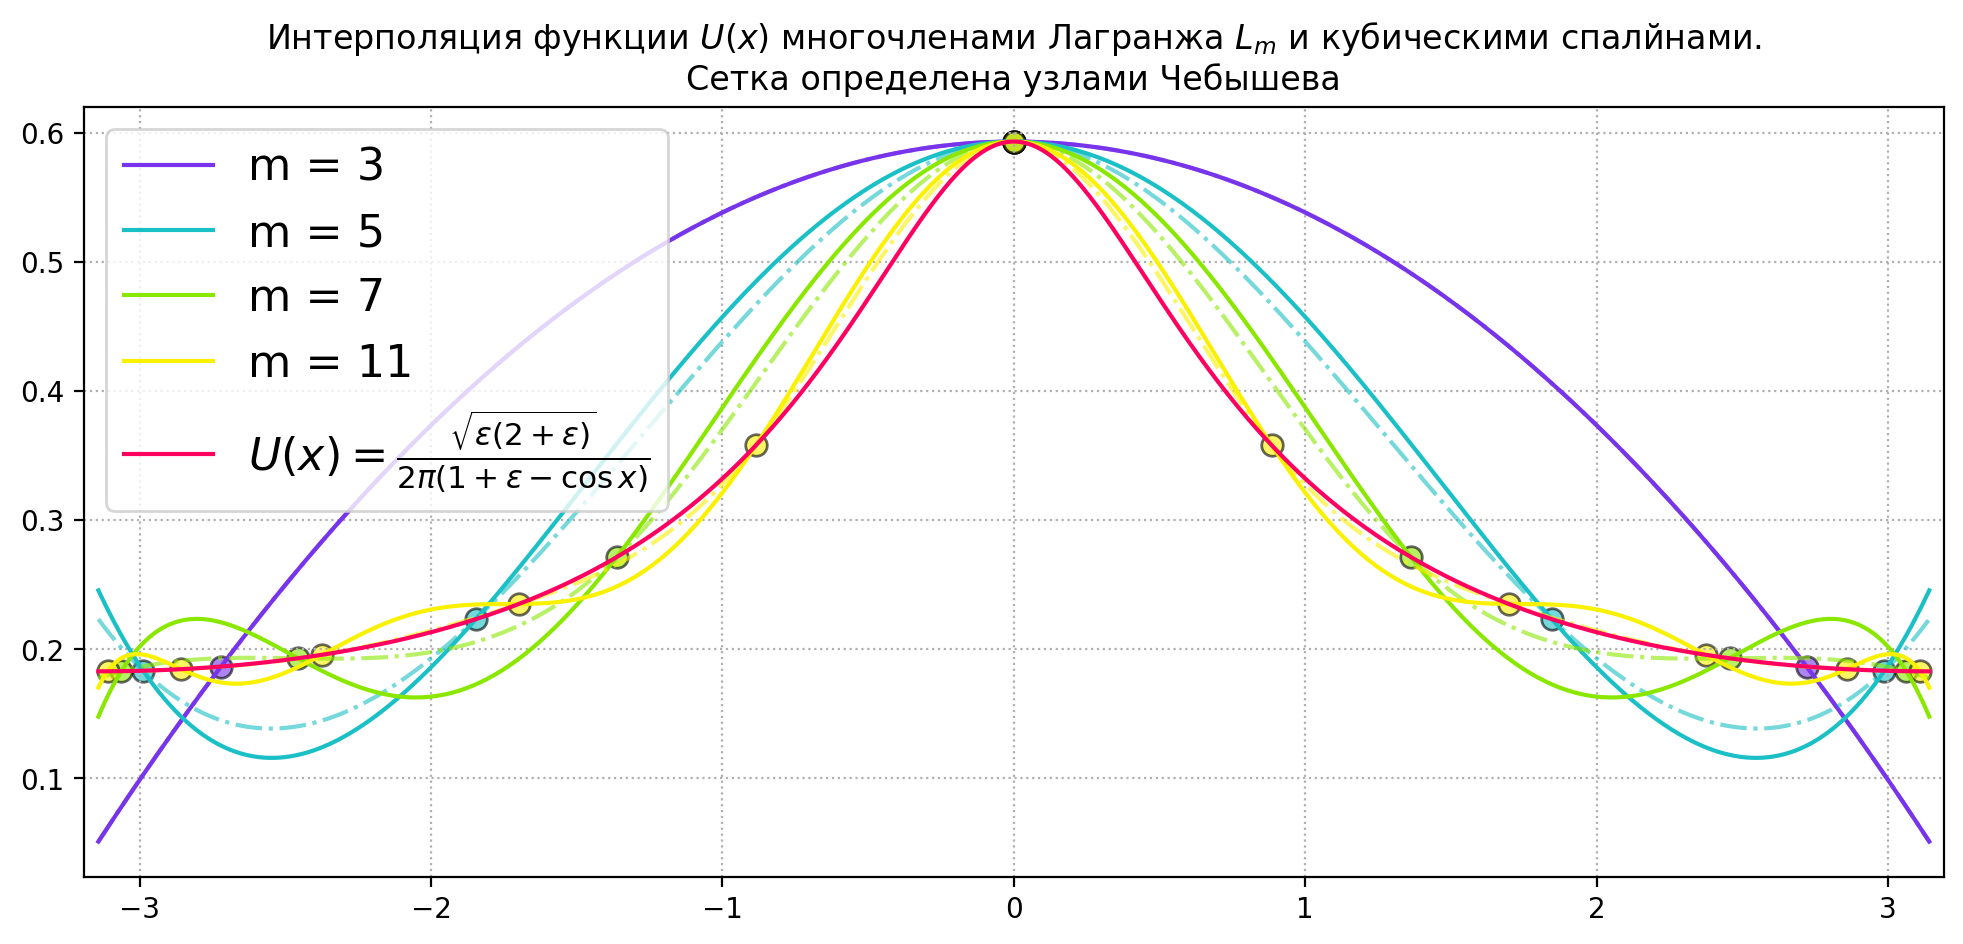

In [48]:
from scipy import interpolate
left_limit, right_limit = -np.pi, np.pi
x_line = np.linspace(left_limit, right_limit, 1000)
m_values = [3, 5, 7, 11]
colors = ['#7734ea', '#1ac0c6', '#8ae800', '#faf100', '#ff0061']
interpolations_cheb = []
plt.figure(figsize = (12, 5), dpi = 200)
for m, color in zip(m_values, colors):
    grid_x = cheb_nodes(m, a = left_limit, b = right_limit)
    grid_y = U(grid_x)
    lagr = LagrangeInterpolator(grid_x, grid_y)
    spline_interpolation = interpolate.CubicSpline(x = grid_x,
                                                   y = grid_y)(x_line)
    y_interpolation = [lagr(x) for x in x_line]
    interpolations_cheb.append(y_interpolation)
    plt.plot(x_line, y_interpolation, color = color, alpha = 1, label = f'm = {m}')
    plt.scatter(grid_x, grid_y, color = color, alpha = 0.6, s = 60, edgecolors = '#000000')
    plt.plot(x_line, spline_interpolation, '-.', color = color, alpha = 0.6)
    
plt.plot(x_line, U(x_line), color = colors[-1], label = r'$U(x) = \frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}$')
plt.legend(fontsize = 16, loc = 'upper left')
plt.xlim(left_limit - 0.05, right_limit + 0.05)
plt.grid(ls = ':')
plt.title('Интерполяция функции $U(x)$ многочленами Лагранжа $L_{m}$ и кубическими спалйнами.\nСетка определена узлами Чебышева', fontsize = 12);

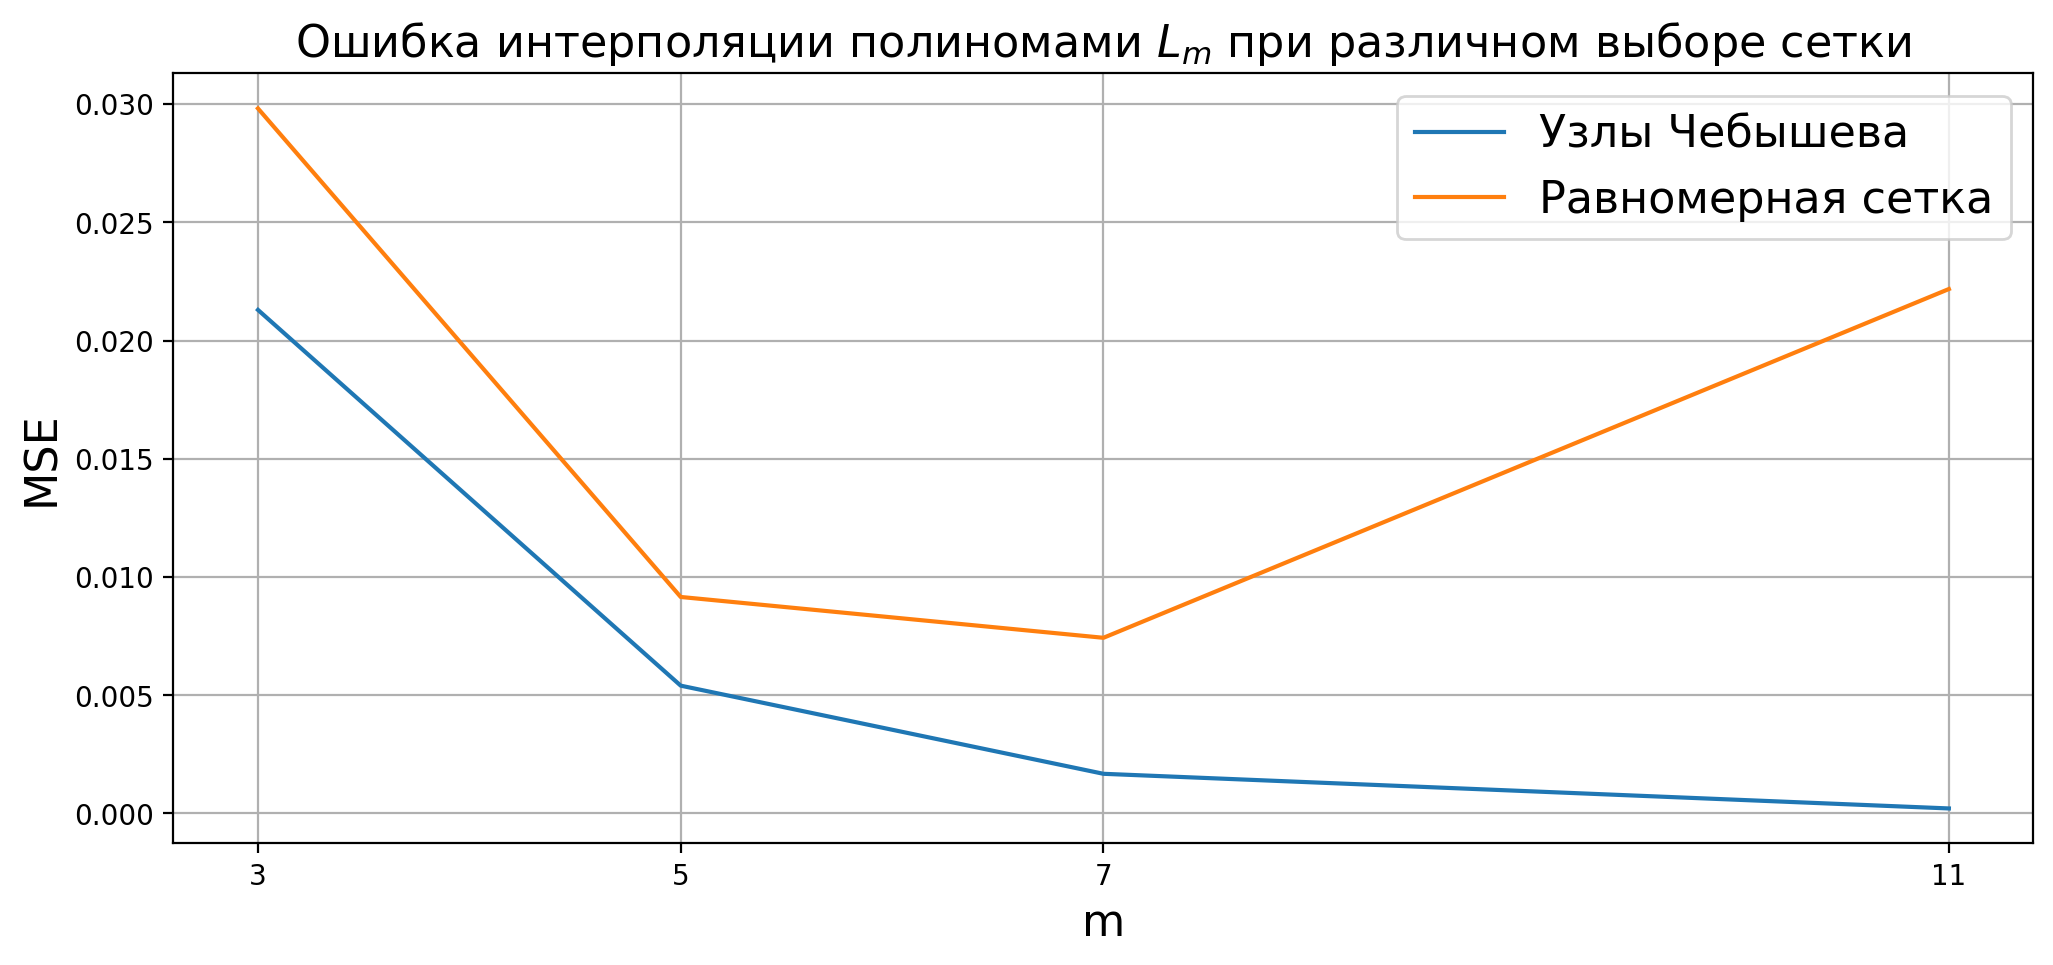

In [49]:
from sklearn import metrics
true_values = U(x_line)
MSE_cheb = [metrics.mean_squared_error(true_values, interp) for interp in interpolations_cheb]
MSE_uniform = [metrics.mean_squared_error(true_values, interp) for interp in intepolations_uniform]
plt.figure(figsize = (12, 5), dpi = 200)
plt.plot(m_values, MSE_cheb, label = 'Узлы Чебышева')
plt.plot(m_values, MSE_uniform, label = 'Равномерная сетка')
plt.legend(fontsize = 16)
plt.xlabel('m', fontsize = 16)
plt.ylabel('MSE', fontsize = 16)
plt.xticks(m_values)
plt.grid()
plt.title("Ошибка интерполяции полиномами $L_m$ при различном выборе сетки", fontsize = 16);

# Задача 4. Полиномы Чебышева.

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

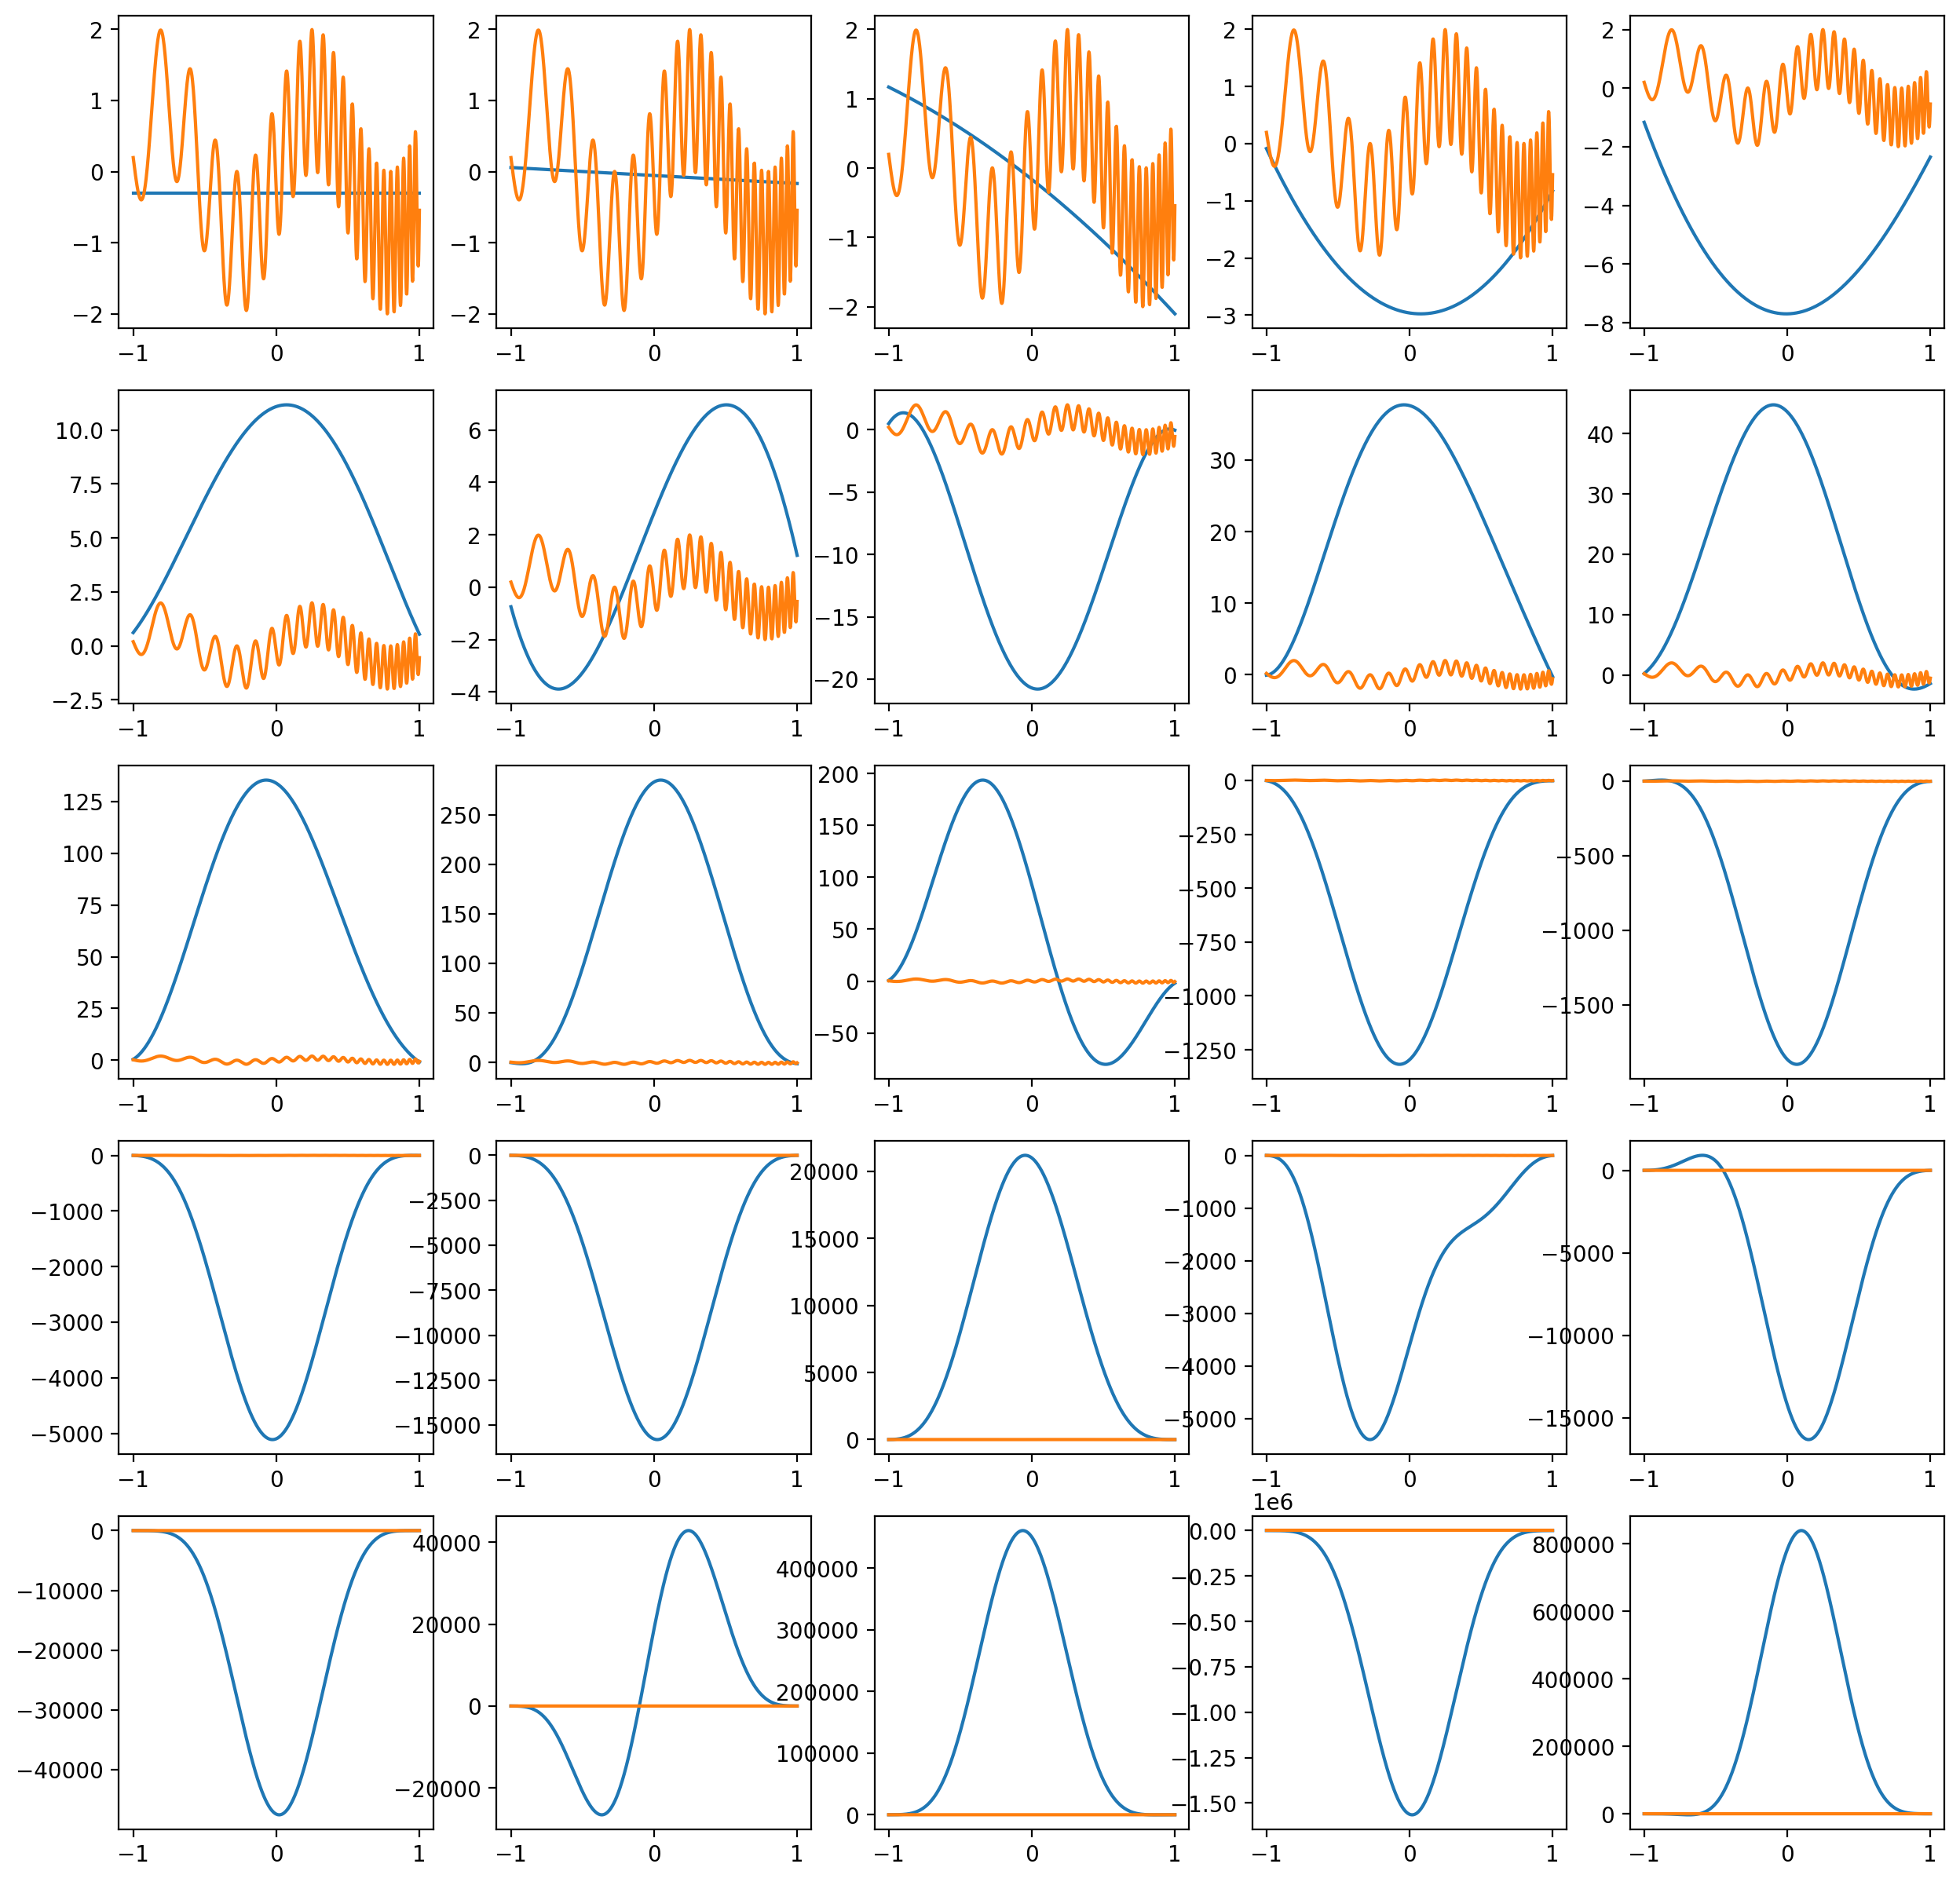

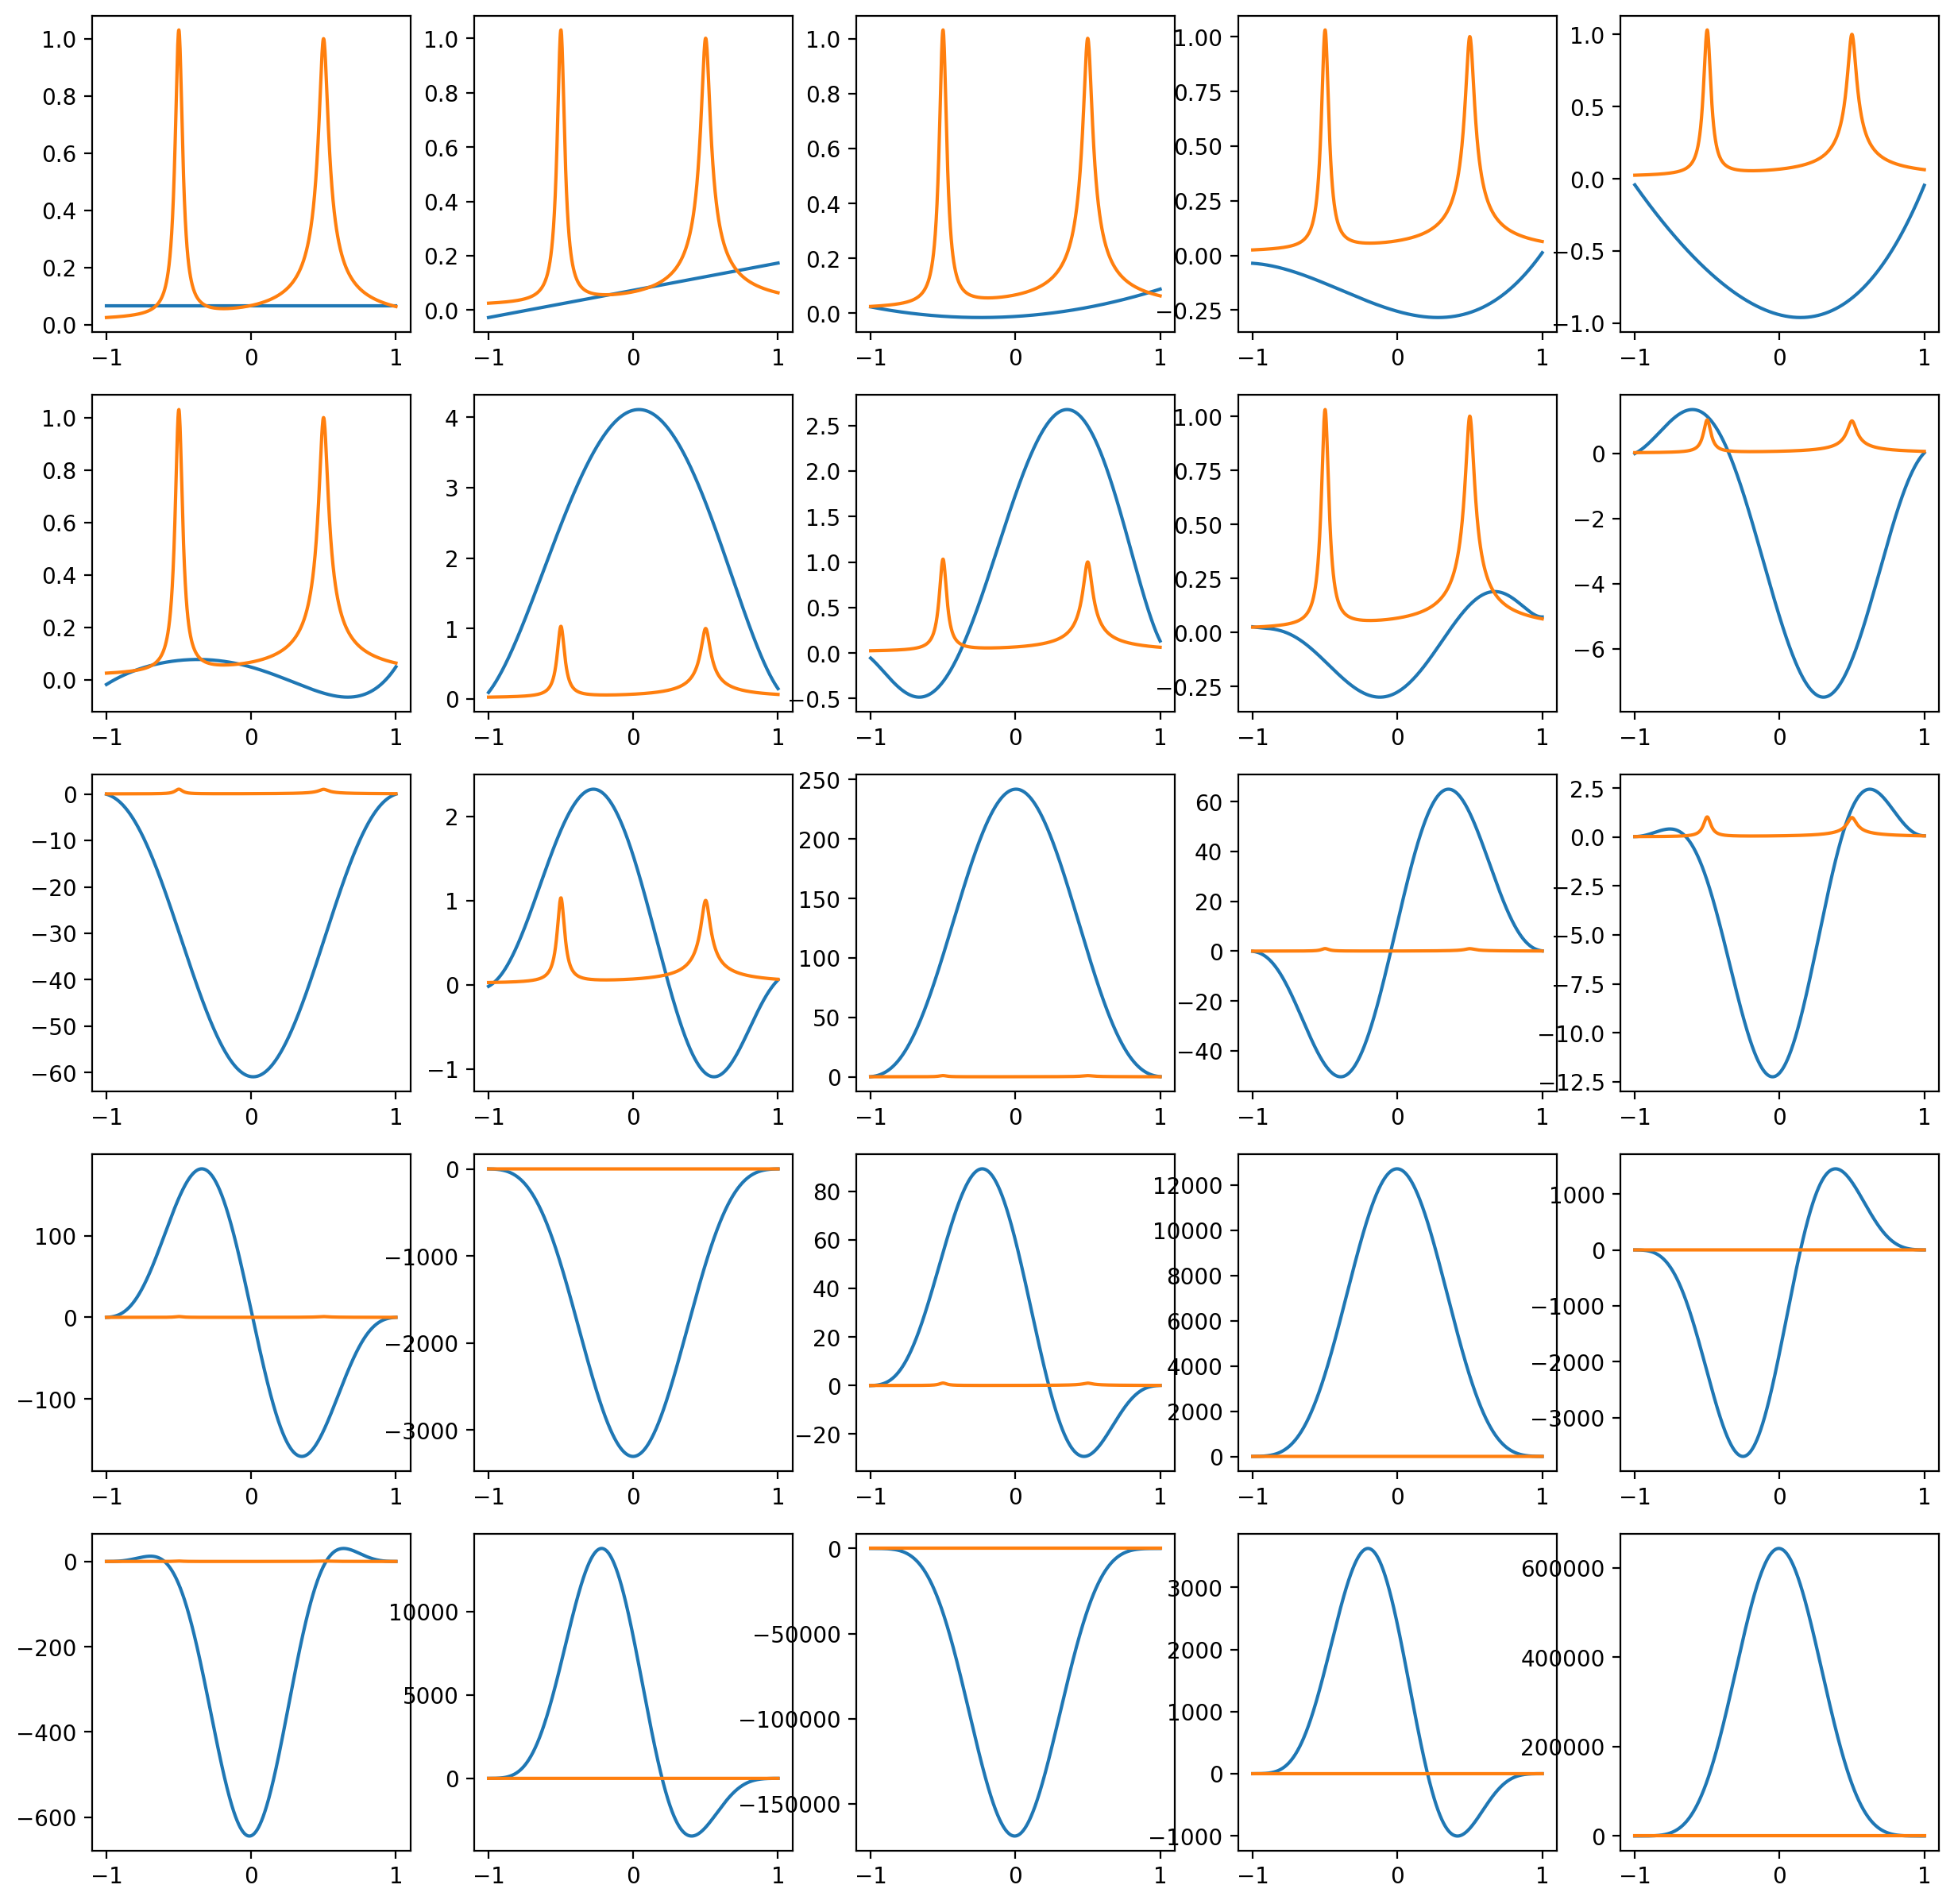

In [78]:
y1_f = lambda x: np.sin(6 * x) + np.sin(60 * np.exp(x))
y2_f = lambda x: 1 / (1 + 1000 * np.power(x + 0.5, 2)) + 1 / np.sqrt(1 + 1000 * np.power(x - 0.5, 2)) 
n_values = np.arange(25)
x_line = np.linspace(-1, 1, 1000)
for func in [y1_f, y2_f]:
    fig, ax = plt.subplots(5, 5, figsize = (15, 15), dpi = 200)
    for n, plotable in zip(n_values, ax.ravel()):
        cheb = np.polynomial.chebyshev.chebinterpolate(func, deg = n)
        interpolation_p = np.poly1d(np.polynomial.chebyshev.cheb2poly(cheb))
        
        plotable.plot(x_line, interpolation_p(x_line))
        plotable.plot(x_line, func(x_line))

# Задача 5. Приближение разными функциями.

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

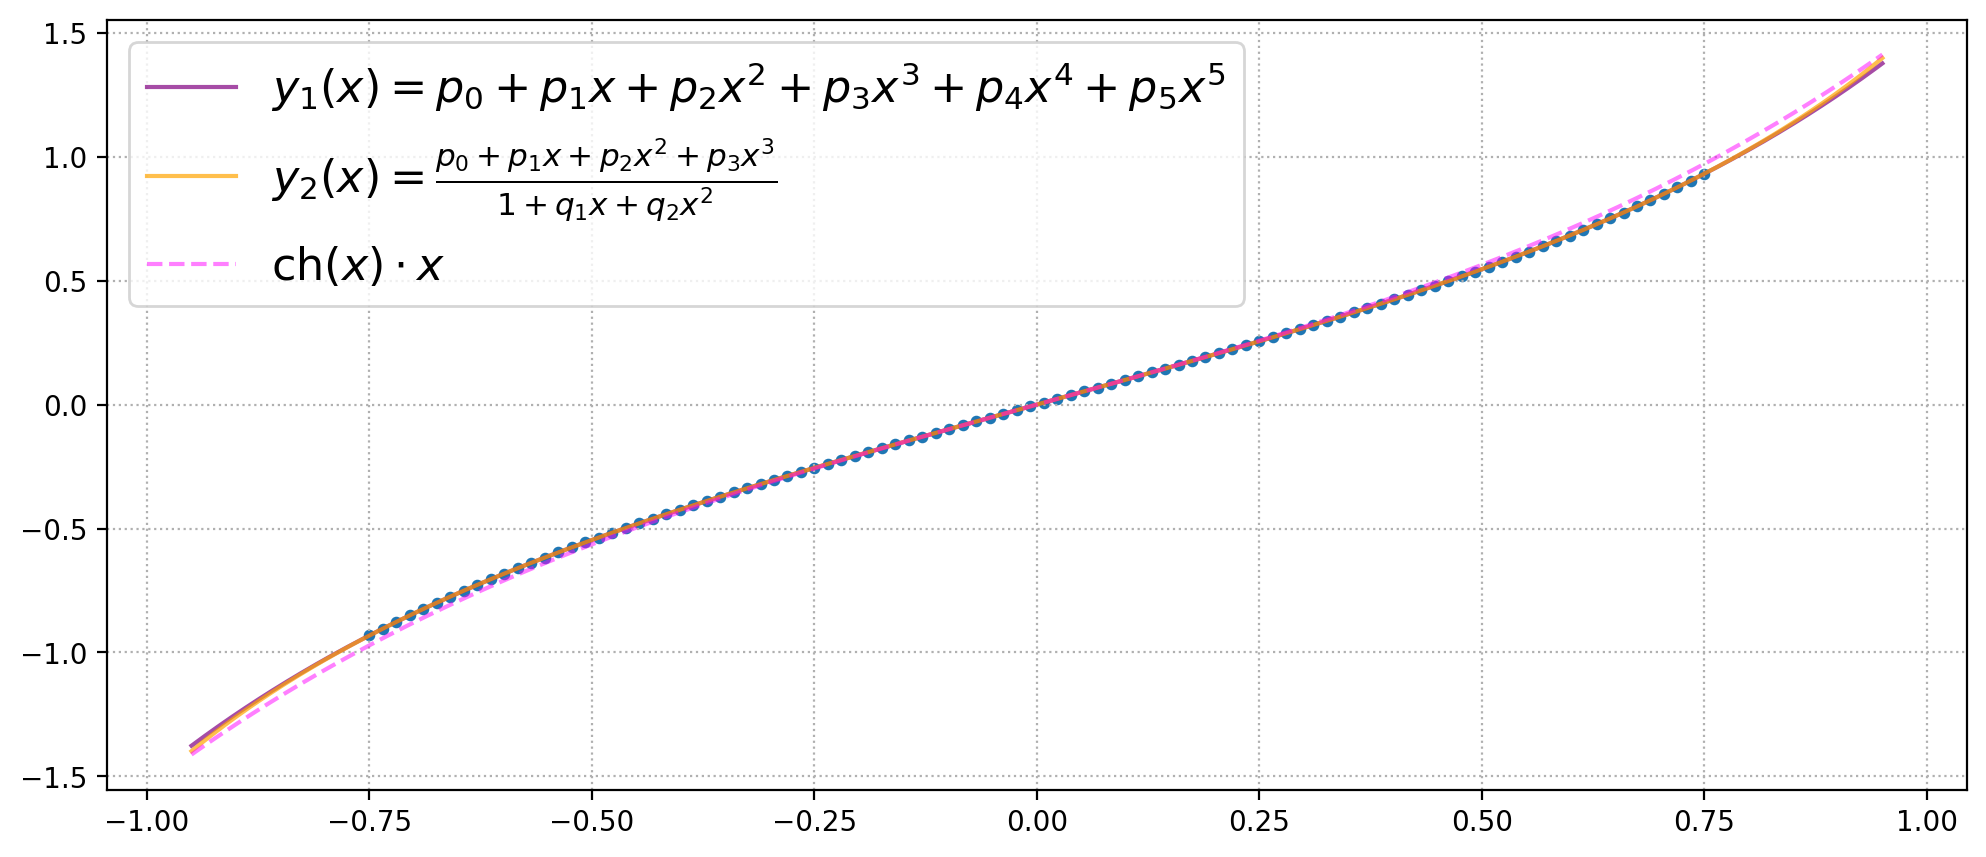

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import optimize
import numpy as np
with np.load('data_interp.npz') as data:
  x4, y4 = data['x4'], data['y4']

func1 = lambda x, p0, p1, p2, p3, p4, p5: p0 + p1 * x + p2 * np.power(x, 2) + p3 * np.power(x, 3) + p4 * np.power(x, 4) + p5 * np.power(x, 5)
func2 = lambda x, p0, p1, p2, p3, q1, q2: (p0 + p1 * x + p2 * np.power(x, 2) + p3 * np.power(x, 3)) / (1 + q1 * x + q2 * np.power(x, 2))

param1, _ = optimize.curve_fit(func1, x4, y4)
param2, _ = optimize.curve_fit(func2, x4, y4)

x_line = np.linspace(np.min(x4) - 0.2, np.max(x4) + 0.2, 1000)
plt.figure(figsize = (12, 5), dpi = 200)
plt.scatter(x4, y4, s = 10)
plt.plot(x_line, 
         func1(x_line, *param1), 
         label = r'$y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}$',
         color = 'purple', 
         alpha = 0.7)
plt.plot(x_line, 
         func2(x_line, *param2), 
         label = r'$y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}$',
         color = 'orange',
         alpha = 0.7)

plt.plot(x_line, np.cosh(x_line) * x_line, color = 'magenta', label = r'$\operatorname{ch}(x) \cdot x$', alpha = 0.5, linestyle = '--')

plt.legend(fontsize = 16)
plt.grid(ls = ':')

# Задача 6. Аппроксимация узлов Чебышева.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным?

(-0.06153846153846154, 1.0746450304259636)

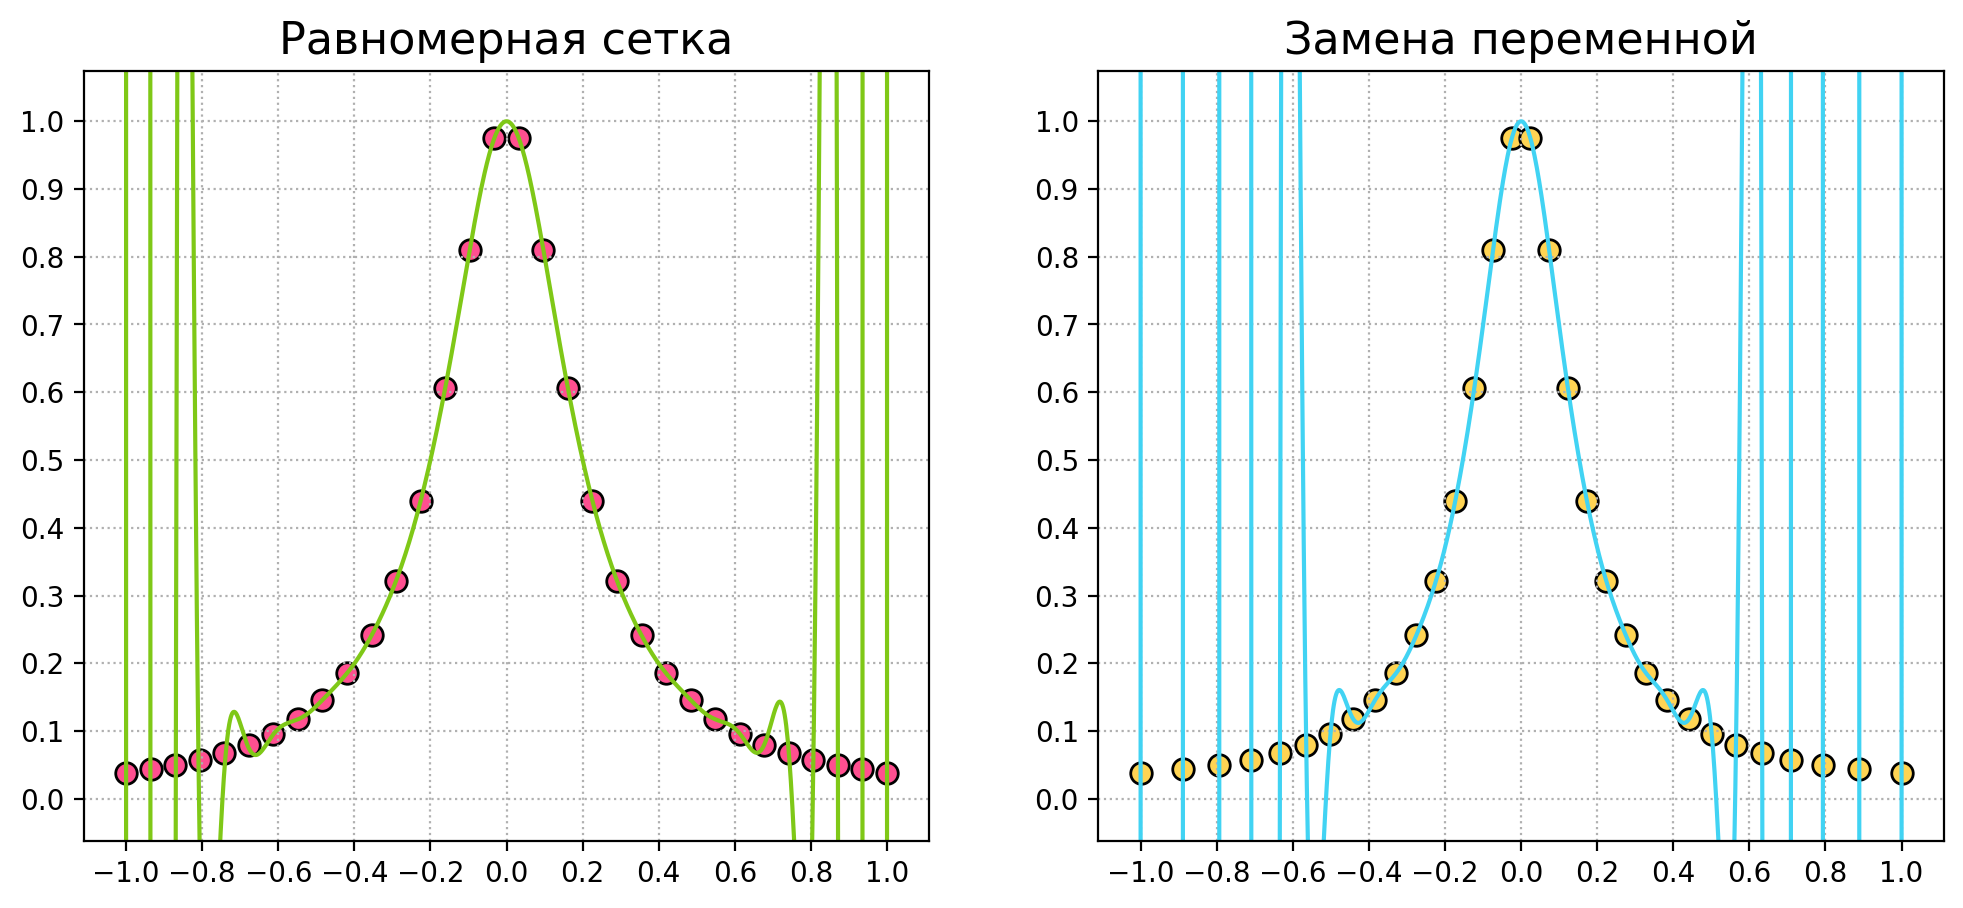

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import interpolate
from numpy.polynomial import Polynomial
def g(s):
    return (40320 * s + 6720 * np.power(s, 3) + 3024 * np.power(s, 5) + 1800 * np.power(s, 7) + 1225 * np.power(s, 9)) / 53089
with np.load('data_interp.npz') as data:
    x5, y5 = data['x5'], data['y5']

x_line = np.linspace(-1.01, 1.01, 1000)
lagrange_poly = interpolate.lagrange(x5, y5)
fig, ax = plt.subplots(1, 2, figsize = (12, 5), dpi = 200)
ax[0].plot(x_line, Polynomial(lagrange_poly.coef[::-1])(x_line), label = 'полином Лагранжа', color = '#7FC817')
ax[0].scatter(x5, y5, color = '#FF4F90', edgecolors = '#000000', label = 'Данные', s = 60)

for a in ax:
    a.set_yticks(np.arange(0, 1.1, 0.1))
    a.set_xticks(np.arange(-1, 1.1, 0.2))
    a.grid(ls = ':')
    a.set_ylim(np.min(y5) - 0.1, np.max(y5) + 0.1)
ax[0].set_title('Равномерная сетка', fontsize = 16)

x_new = g(x5)
ax[1].scatter(x_new, y5, color = '#FFD453', s = 60, edgecolors = '#000000')
lagrange_poly_new = interpolate.lagrange(x_new, y5)
ax[1].plot(x_line, Polynomial(lagrange_poly_new.coef[::-1])(x_line), color = '#41D3F3')
ax[1].set_title("Замена переменной", fontsize = 16)
ax[1].set_ylim(np.min(y5) - 0.1, np.max(y5) + 0.1)
